# Прогнозирование цен потребительского ритейла по тестовой выборке на основе глубоких нейронных сетей
__Выполнил:__ *Домченко Максим*

__Студент группы:__ *РИМ-130962*

In [1]:
# Подключение Google Drive к Colab
from google.colab import drive
drive.mount('/content/drive')

# Путь к папке с данными и моделями
DATA = "/content/drive/MyDrive/price_forecasting/data"
MODELS = "/content/drive/MyDrive/price_forecasting/models"
MODELS_TEST_1_EPOCH = "/content/drive/MyDrive/price_forecasting/models_test_1_epoch"

Mounted at /content/drive


In [2]:
# Библиотеки для анализа данных
import numpy as np
import pandas as pd
import pickle
import torch

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Метрики для оценки моделей
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Игнорируем предупреждения для чистоты вывода
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализаций
plt.rcParams["figure.figsize"] = (14, 6)
sns.set_theme(style="darkgrid", font_scale=1.2)

In [3]:
# Функция загрузки сохранённых метрик моделей
def load_metrics(path):
    with open(path, 'rb') as f:
        metrics = pickle.load(f)
    return metrics

# Метрики для модели TFT (1 эпоха)
tft_1_epoch_metrics = load_metrics(f"{MODELS_TEST_1_EPOCH}/tft_model_limited_dataset_metrics.pkl")

# Метрики для модели TFT (15 эпох)
tft_15_epoch_metrics = load_metrics(f"{MODELS}/tft_model_limited_dataset_metrics.pkl")

# Метрики для модели XGBoost
xgboost_metrics = load_metrics(f"{MODELS}/xgboost_model_extended_metrics.pkl")

print("Метрики успешно загружены")

Метрики успешно загружены


In [4]:
# Создание датафреймов из метрик для удобного сравнения
def create_metrics_df(metrics_dict, model_name):
    rows = []
    if 'train_metrics' in metrics_dict or 'val_metrics' in metrics_dict or 'test_metrics' in metrics_dict:
        for dataset_name, dataset_metrics in metrics_dict.items():
            row = dataset_metrics.copy()
            row['dataset'] = dataset_name
            row['model'] = model_name
            rows.append(row)
    else:
        # Для метрик XGBoost с отдельными наборами train/val/test в одном словаре
        row = {}
        for key, value in metrics_dict.items():
            if '_' in key:
                metric, dataset = key.rsplit('_', 1)
                row.setdefault(dataset, {})[metric] = value
        for dataset, metrics in row.items():
            metrics['dataset'] = f"{dataset}_metrics"
            metrics['model'] = model_name
            rows.append(metrics)

    return pd.DataFrame(rows)

# Подготовка датафреймов для каждой модели
tft_1_epoch_df = create_metrics_df(tft_1_epoch_metrics, 'TFT (1 epoch)')
tft_15_epoch_df = create_metrics_df(tft_15_epoch_metrics, 'TFT (15 epochs)')
xgboost_df = create_metrics_df(xgboost_metrics, 'XGBoost')

# Объединение всех датафреймов в один
metrics_df = pd.concat([tft_1_epoch_df, tft_15_epoch_df, xgboost_df], ignore_index=True)

# Вывод полученных данных
metrics_df.head(10)

,MAE,MSE,RMSE,MAPE,R2,dataset,model
0,0.224936,0.125381,0.354092,1.638092e+14,0.629189,train_metrics,TFT (1 epoch)
1,0.197640,0.067157,0.259147,1.434614e-01,0.779318,val_metrics,TFT (1 epoch)
2,0.197661,0.067541,0.259886,1.414022e-01,0.777260,test_metrics,TFT (1 epoch)
3,0.067749,0.057716,0.240241,1.539963e+14,0.829307,train_metrics,TFT (15 epochs)
4,0.038853,0.003394,0.058261,2.800019e-02,0.988846,val_metrics,TFT (15 epochs)
5,0.041476,0.003630,0.060250,3.030877e-02,0.988028,test_metrics,TFT (15 epochs)
6,1.079914,4.060909,2.015170,5.066827e-01,0.305240,train_metrics,XGBoost
7,1.259459,5.051895,2.247642,6.029652e-01,0.216490,val_metrics,XGBoost
8,1.257825,5.052282,2.247728,5.974367e-01,0.215391,test_metrics,XGBoost


### Все графики

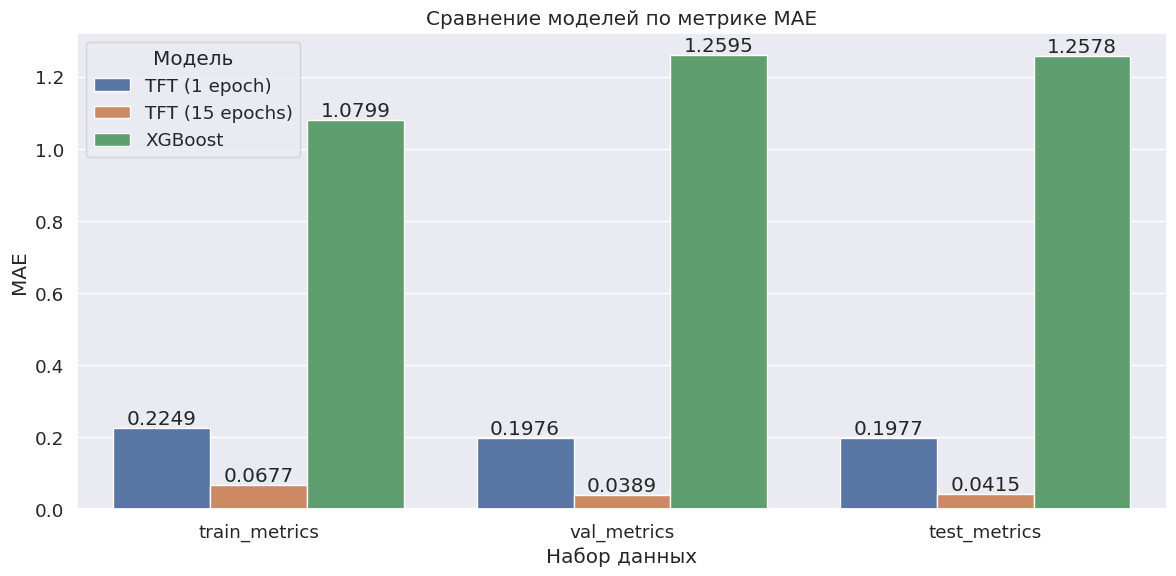

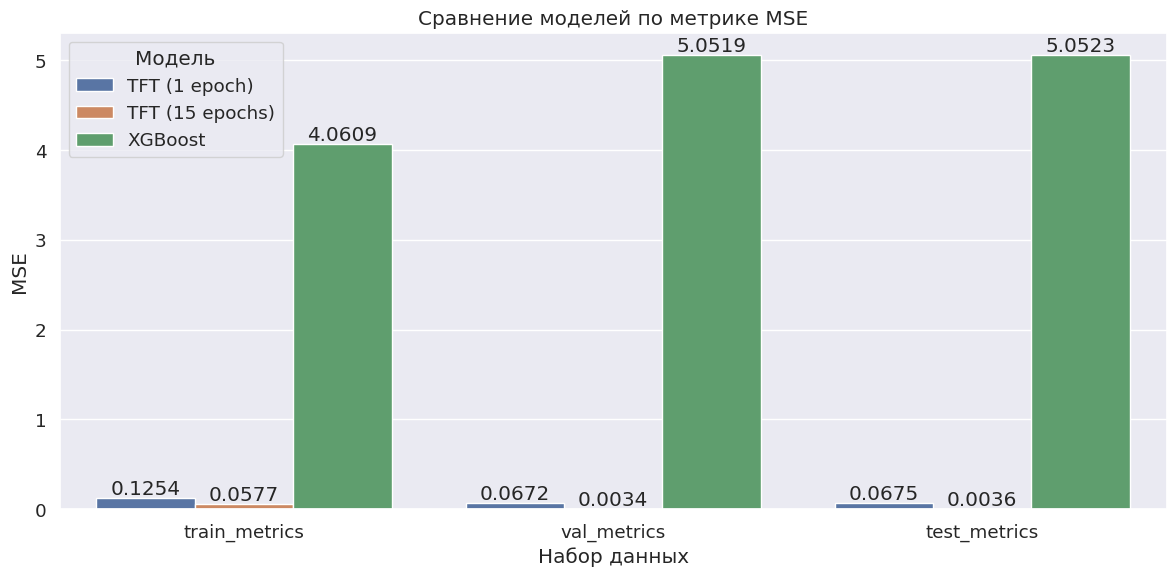

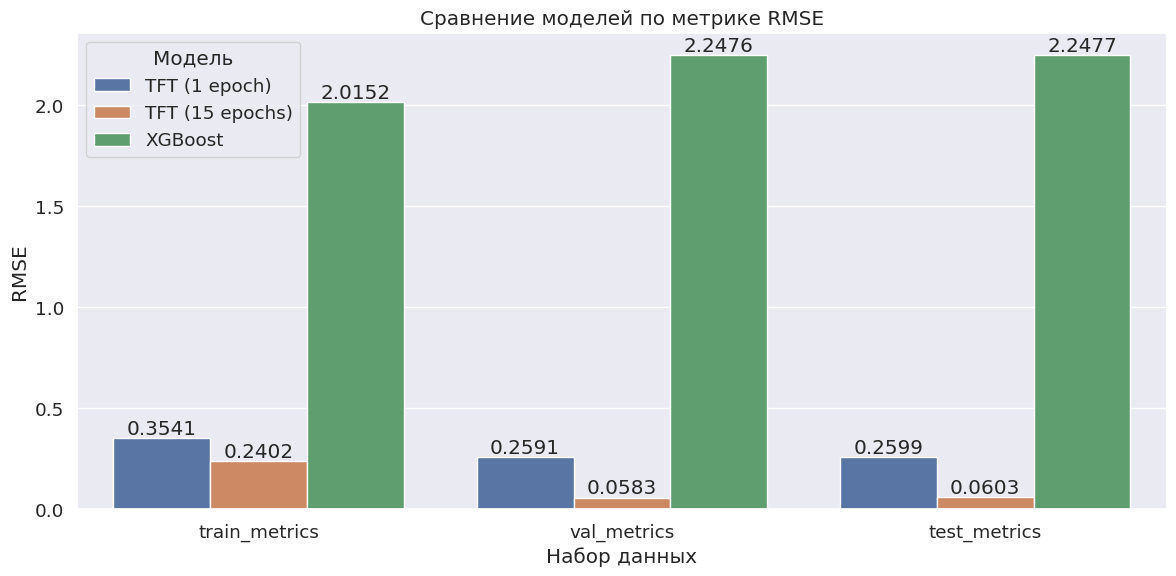

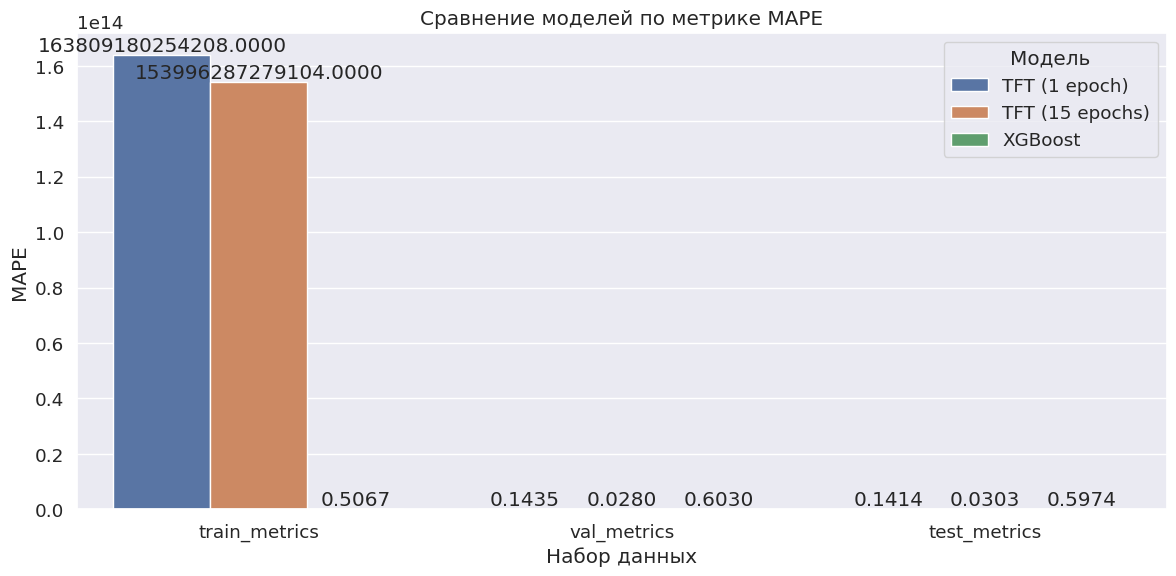

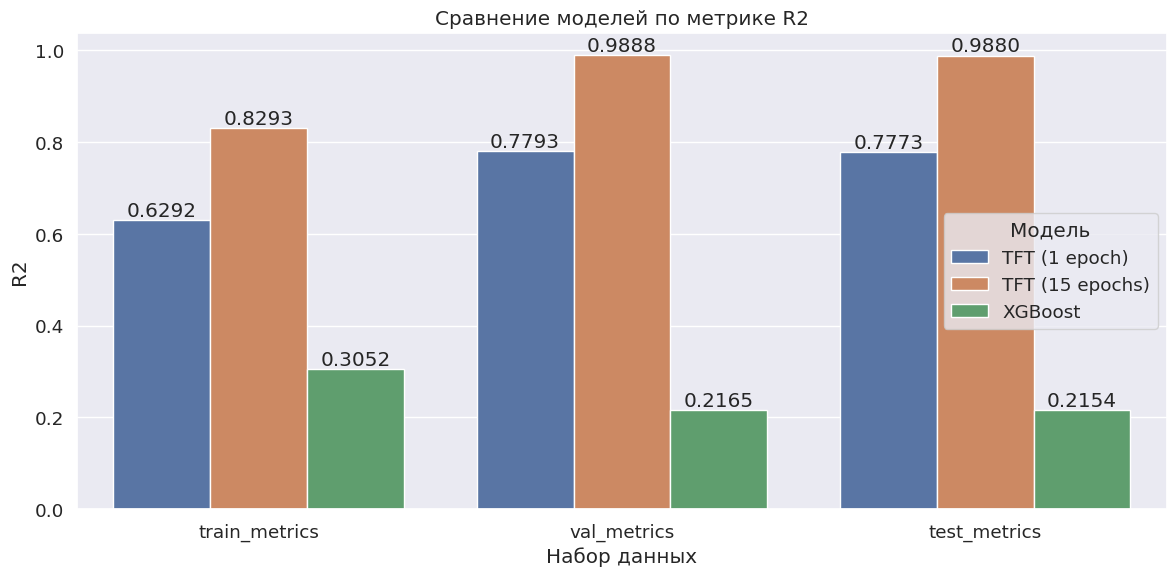

In [5]:
metrics_list = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2']

# Визуализация метрик для каждого набора данных
for metric in metrics_list:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='dataset', y=metric, hue='model', data=metrics_df)
    plt.title(f'Сравнение моделей по метрике {metric}')
    plt.xlabel('Набор данных')
    plt.ylabel(metric)
    plt.legend(title='Модель')

    # Добавление значений над столбцами
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f')

    plt.tight_layout()
    plt.show()
    print("\n")


### MAE

## Mean Absolute Error (MAE)

Средняя абсолютная ошибка (**MAE**) измеряет среднюю абсолютную разницу между предсказанными и фактическими значениями. Чем ниже значение MAE, тем точнее прогноз модели.

**Формула:**
$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
$$

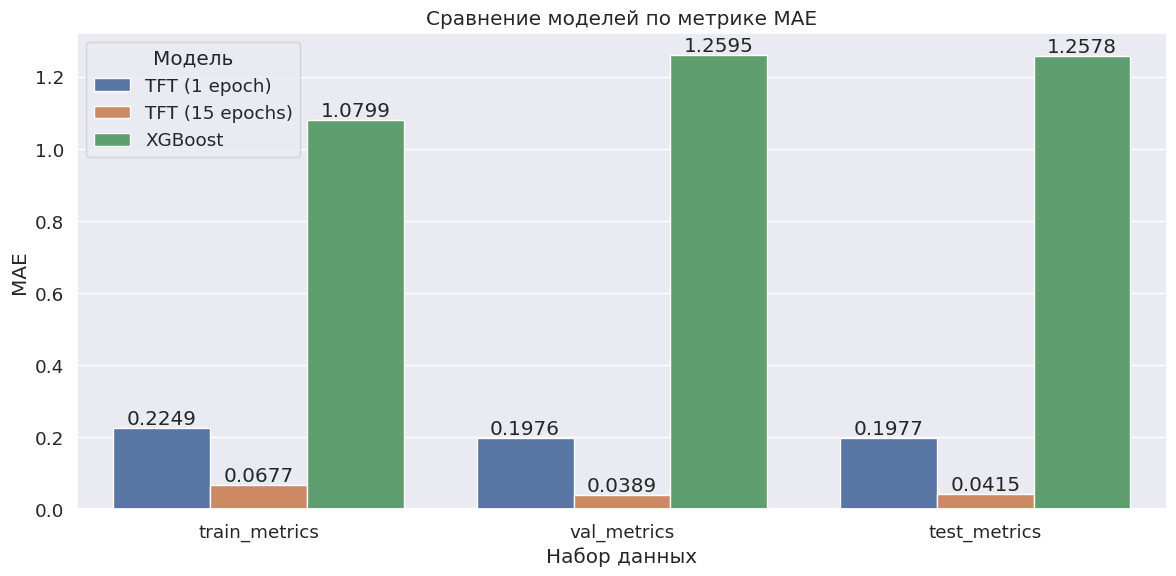

In [6]:
metric = 'MAE'

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='dataset', y=metric, hue='model', data=metrics_df)
plt.title(f'Сравнение моделей по метрике {metric}')
plt.xlabel('Набор данных')
plt.ylabel(metric)
plt.legend(title='Модель')

# Добавление значений над столбцами
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.tight_layout()
plt.show()

### Выводы по метрике MAE:

- **TFT (15 эпох)** показала наилучшие результаты (наименьшее значение ошибки) по всем наборам данных (train, validation, test). Это подтверждает, что увеличение количества эпох значительно улучшает качество прогнозирования.
- **TFT (1 эпоха)** демонстрирует средний уровень ошибки, лучше чем у XGBoost, но заметно хуже, чем у модели, обученной на 15 эпохах.
- **XGBoost** показала наибольшие значения ошибки MAE по всем наборам данных, что свидетельствует о слабом качестве прогноза данной модели без дополнительной оптимизации.


### MSE

## Mean Squared Error (MSE)

Среднеквадратичная ошибка (**MSE**) измеряет среднее значение квадратов разностей между предсказанными и фактическими значениями. Метрика сильно штрафует большие ошибки. Чем ниже значение MSE, тем точнее прогноз модели.

**Формула:**
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

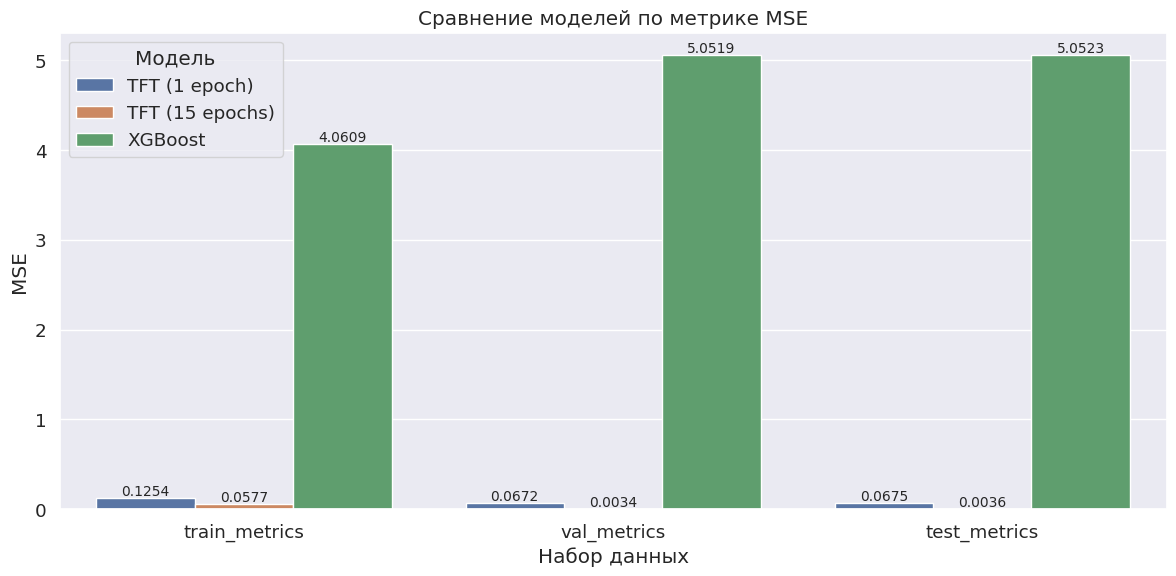

In [7]:
metric = 'MSE'

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='dataset', y=metric, hue='model', data=metrics_df)
plt.title(f'Сравнение моделей по метрике {metric}')
plt.xlabel('Набор данных')
plt.ylabel(metric)

# Добавляем значения на графике
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', fontsize=10)

plt.legend(title='Модель')
plt.tight_layout()
plt.show()

- **XGBoost** демонстрирует гораздо более высокие значения MSE (около 4–5), что свидетельствует о значительных ошибках прогнозов этой модели по сравнению с TFT.
- **TFT (15 эпох)** существенно улучшает точность прогнозов (значения MSE около 0.0034–0.0577) по сравнению с **TFT (1 эпоха)** (значения MSE около 0.0672–0.1254), что подтверждает эффективность более длительного обучения.

### RMSE

## Root Mean Squared Error (RMSE)

Среднеквадратичная ошибка корня (**RMSE**) является квадратным корнем из MSE и выражается в единицах целевой переменной. RMSE удобно интерпретировать и сравнивать с реальными значениями. Чем ниже значение RMSE, тем точнее прогноз модели.

**Формула:**
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

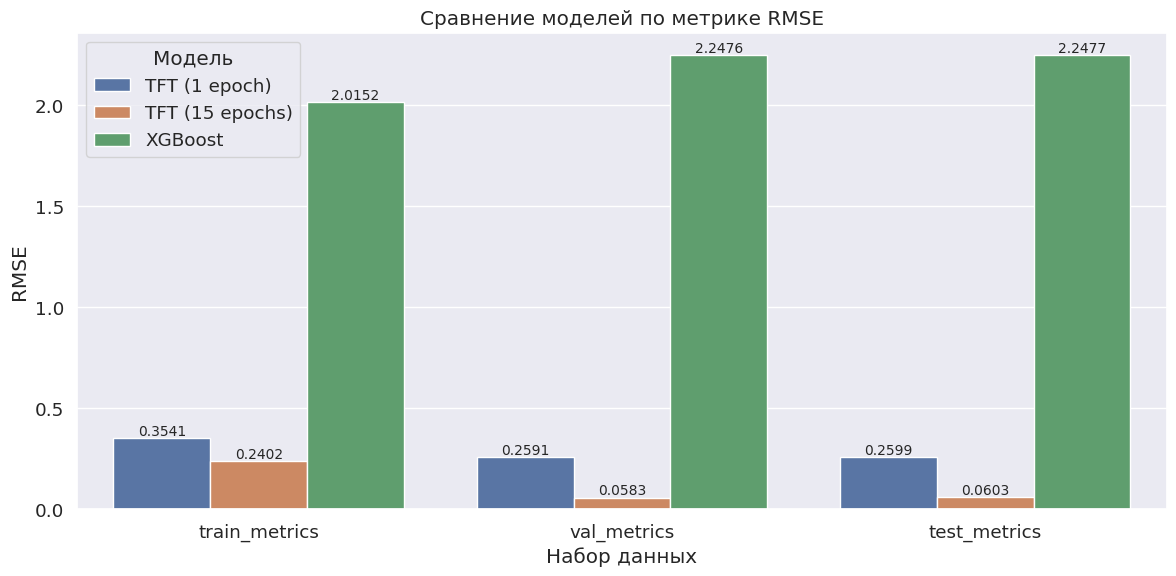

In [8]:
metric = 'RMSE'

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='dataset', y=metric, hue='model', data=metrics_df)
plt.title(f'Сравнение моделей по метрике {metric}')
plt.xlabel('Набор данных')
plt.ylabel(metric)

# Добавляем значения на графике
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', fontsize=10)

plt.legend(title='Модель')
plt.tight_layout()
plt.show()


- Модель **XGBoost** демонстрирует значительно более высокие значения RMSE по сравнению с TFT, что указывает на низкую точность прогнозов.
- **TFT (15 эпох)** значительно улучшает показатели RMSE по сравнению с обучением за 1 эпоху, подтверждая эффективность дополнительного обучения.

### MAPE

## Mean Absolute Percentage Error (MAPE)

Средняя абсолютная процентная ошибка (**MAPE**) измеряет среднюю абсолютную разницу между предсказанными и фактическими значениями в процентах от фактических значений. Чем ниже значение MAPE, тем точнее прогноз модели.

**Формула:**
$$
MAPE = \frac{100\%}{n}\sum_{i=1}^{n}\left|\frac{y_i - \hat{y}_i}{y_i}\right|
$$

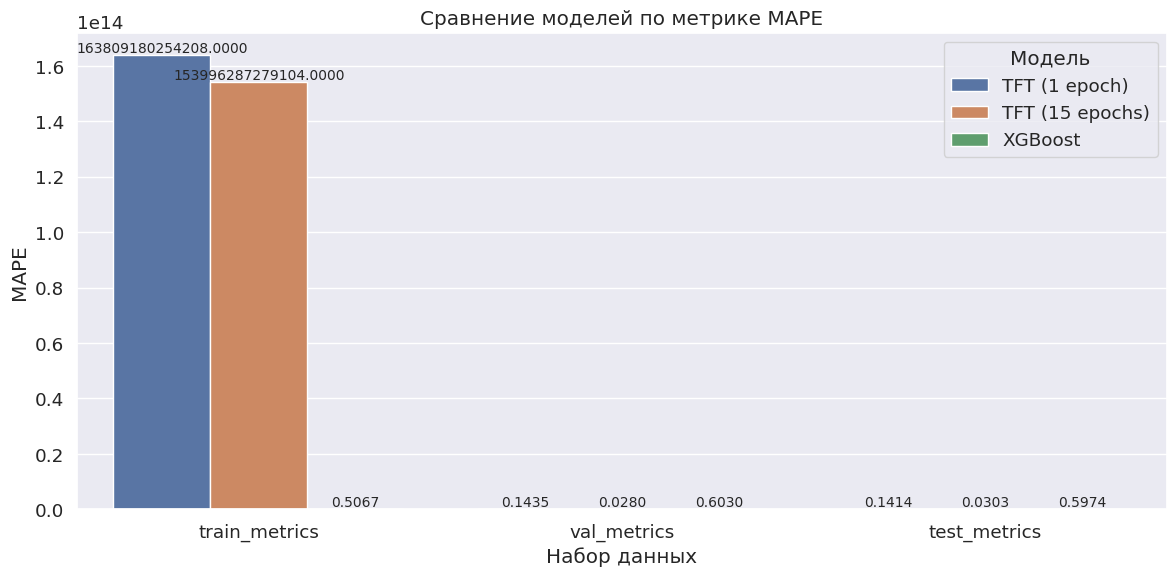

In [9]:
metric = 'MAPE'

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='dataset', y=metric, hue='model', data=metrics_df)
plt.title(f'Сравнение моделей по метрике {metric}')
plt.xlabel('Набор данных')
plt.ylabel(metric)

# Добавляем значения на графике
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', fontsize=10)

plt.legend(title='Модель')
plt.tight_layout()
plt.show()

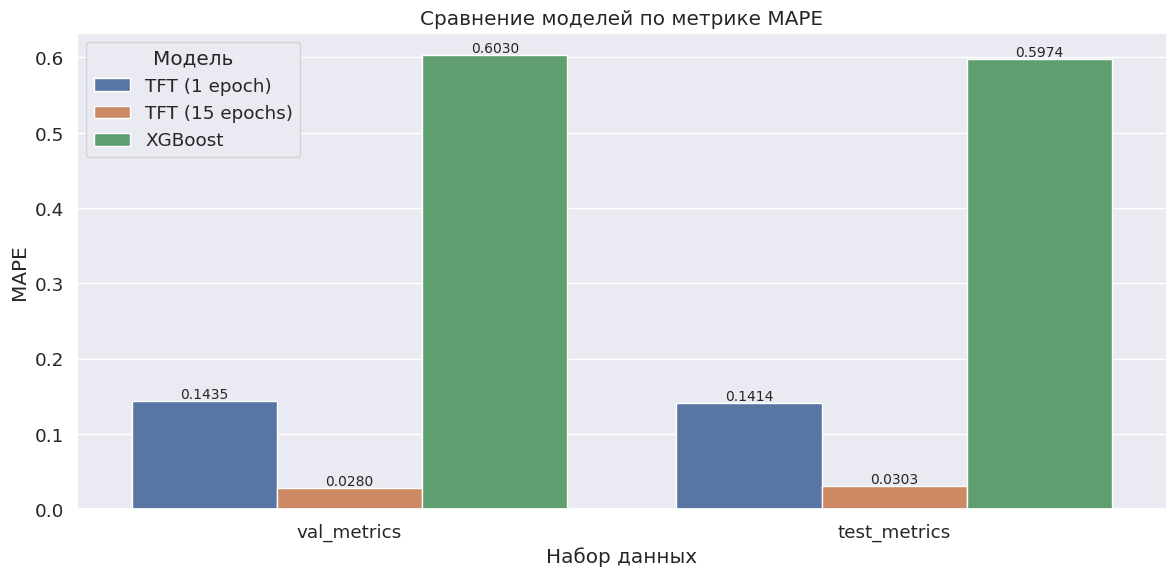

In [12]:
metric = 'MAPE'

# фильтруем данные без train_metrics
filtered_df = metrics_df[metrics_df['dataset'] != 'train_metrics']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='dataset', y=metric, hue='model', data=filtered_df)
plt.title(f'Сравнение моделей по метрике {metric}')
plt.xlabel('Набор данных')
plt.ylabel(metric)

# Добавляем значения на графике
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', fontsize=10)

plt.legend(title='Модель')
plt.tight_layout()
plt.show()

- На тренировочных данных метрика **MAPE** для моделей TFT крайне высока, что может говорить о наличии близких к нулю фактических значений, приводящих к большой относительной ошибке.
- На валидационной и тестовой выборках значения **MAPE** становятся адекватными (очень малы, в диапазоне от 0.03 до 0.6), показывая высокую точность прогнозов модели TFT.
- **XGBoost** показывает стабильно более высокие значения **MAPE** по сравнению с TFT, что подтверждает меньшую точность модели XGBoost по всем наборам данных.

### R²

## Коэффициент детерминации (R²)

Коэффициент детерминации (**R²**) показывает долю дисперсии целевой переменной, объясняемую моделью. Значение R² близкое к 1 говорит о высокой точности модели, а значение близкое к 0 говорит о том, что модель плохо объясняет данные.

**Формула:**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$


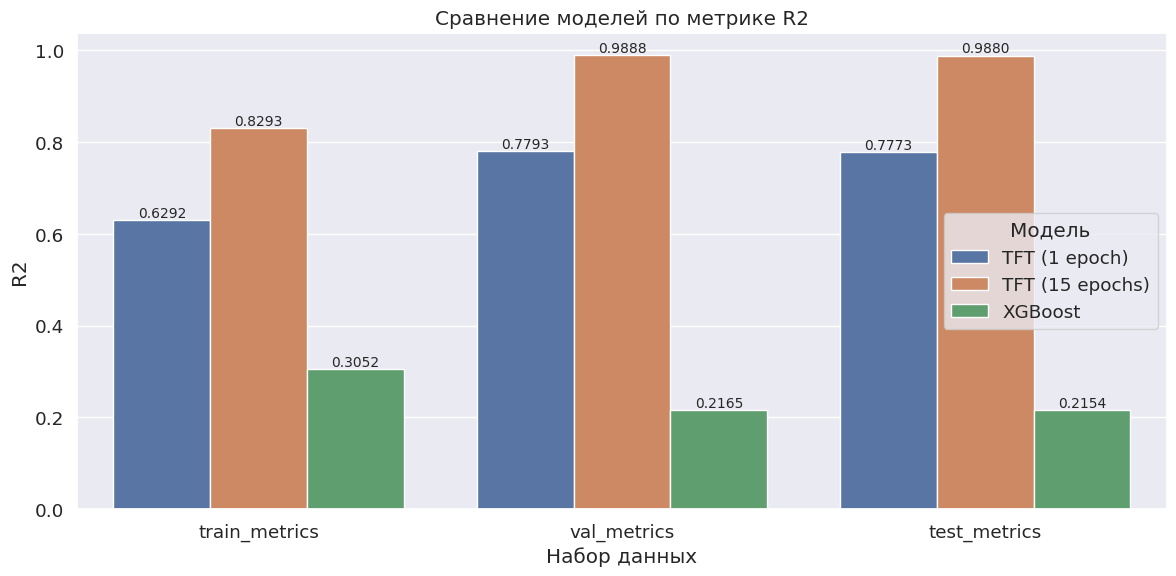

In [11]:
metric = 'R2'

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='dataset', y=metric, hue='model', data=metrics_df)
plt.title(f'Сравнение моделей по метрике {metric}')
plt.xlabel('Набор данных')
plt.ylabel(metric)

# Добавляем значения на графике
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', fontsize=10)

plt.legend(title='Модель')
plt.tight_layout()
plt.show()

- Модель **TFT (15 эпох)** показывает наиболее высокие значения R², близкие к 1, что говорит о её высокой точности и хорошей объяснительной способности.
- **TFT (1 эпоха)** существенно менее точна, однако всё равно превосходит модель **XGBoost**, которая показывает низкие значения R², свидетельствующие о недостаточной эффективности.

## Анализ и сравнение моделей по метрикам

Проанализируем результаты, полученные для каждой метрики (MAE, MSE, RMSE, MAPE, R²):

### MAE (Mean Absolute Error)
- Чем ниже MAE, тем точнее модель предсказывает абсолютные значения.
- **Вывод:** Модель с наименьшим значением MAE предпочтительна для ситуаций, когда критичны точные прогнозы в единицах товара.

### MSE (Mean Squared Error) и RMSE (Root Mean Squared Error)
- Эти метрики сильнее штрафуют модели за крупные ошибки, чем MAE.
- **Вывод:** Наименьшие значения MSE и RMSE указывают на модели, которые реже допускают большие ошибки в прогнозах.

### MAPE (Mean Absolute Percentage Error)
- Показывает среднюю процентную ошибку прогнозов.
- **Вывод:** Лучшие модели имеют низкие значения MAPE, что особенно важно при прогнозировании цен и объёмов продаж, так как ошибки в процентах легко интерпретировать.

### R² (коэффициент детерминации)
- Чем ближе значение к 1, тем лучше модель объясняет дисперсию данных.
- **Вывод:** Высокий показатель R² свидетельствует о хорошем качестве модели и её способности объяснять изменения в данных.

---

### Итоговый вывод по сравнению моделей:
На основании представленных результатов метрик, можно заключить, что:
- Модель **TFT (15 эпох)** должна показать лучшие результаты по точности прогнозов, благодаря более длительному периоду обучения, однако важно следить за переобучением.
